<a href="https://colab.research.google.com/github/digorcrispim/Ocean_Samsung/blob/main/ocean_python_cienciadedados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # biblioteca para fazer calculos algebricos
import pandas as pd # biblioteca para fazer visualizaçãoes
import seaborn  as sns # "" "" ""
import matplotlib.pyplot as plt #

Conhecendo o Dataset


In [ ]:
df = pd.read_csv('train.csv',index_col= 'id')
df.head() # mostra o conteúdo das 5 primeiras linhas

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include='object') # análise de dados texto

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,36773,37000,35505,29296,36176,36176,37069,37069,37069,37069,37069
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9364,22424,10967,29293,19432,30518,23515,12424,7735,31989,32893


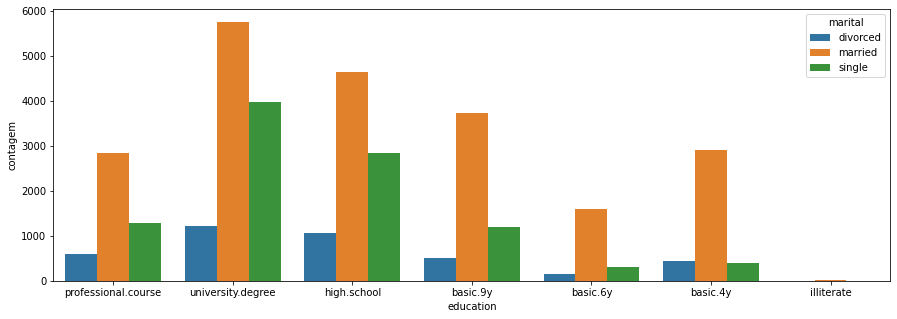

In [ ]:
# use countplot para dados categoricos
plt.figure(figsize=(15,5)) # aumenta a imagem
sns.countplot(data = df, x = 'education', hue = 'marital') # conta a frequencia das categorias em x e hue acrescenta mais categorias em colorida
plt.ylabel('contagem') # muda a label do eixo y
plt.show() #apresenta somente as figuras

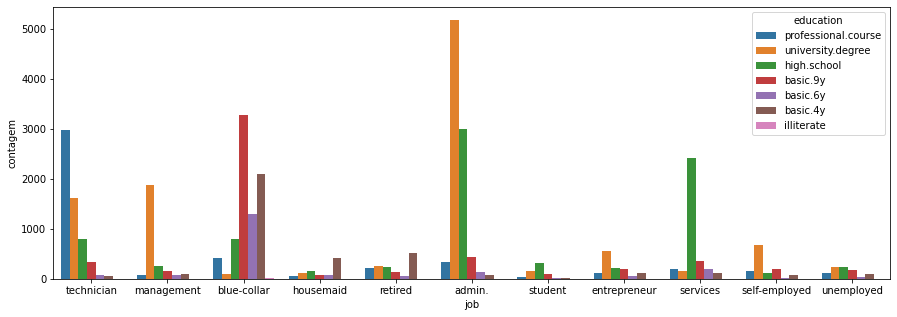

In [ ]:

plt.figure(figsize=(15,5)) # aumenta a imagem
sns.countplot(data = df, x = 'job', hue = 'education') # conta a frequencia das categorias em x e hue acrescenta mais categorias em colorida
plt.ylabel('contagem') # muda a label do eixo y
plt.show() #apresenta somente as figuras

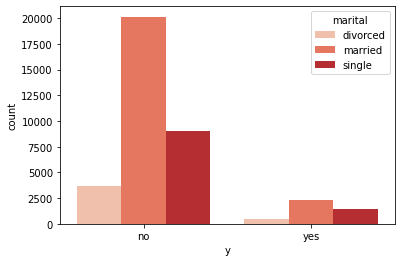

In [ ]:
sns.countplot(data = df, x = 'y', hue = 'marital',palette= 'Reds') # palette modifica as cores das barras

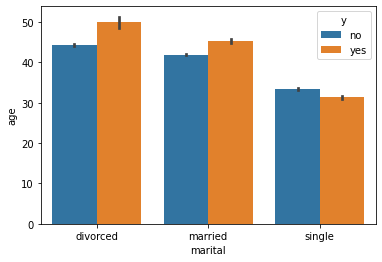

In [ ]:
# dados categóricos e numericos
sns.barplot(data = df, x = 'marital', y = 'age', hue = 'y')

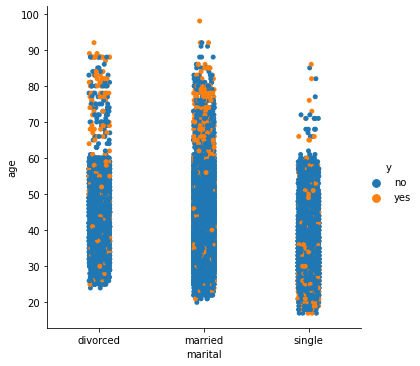

In [ ]:
plt.figure
sns.catplot(data=df, x='marital', y='age', hue='y') #,jitter= 0.05
plt.show()

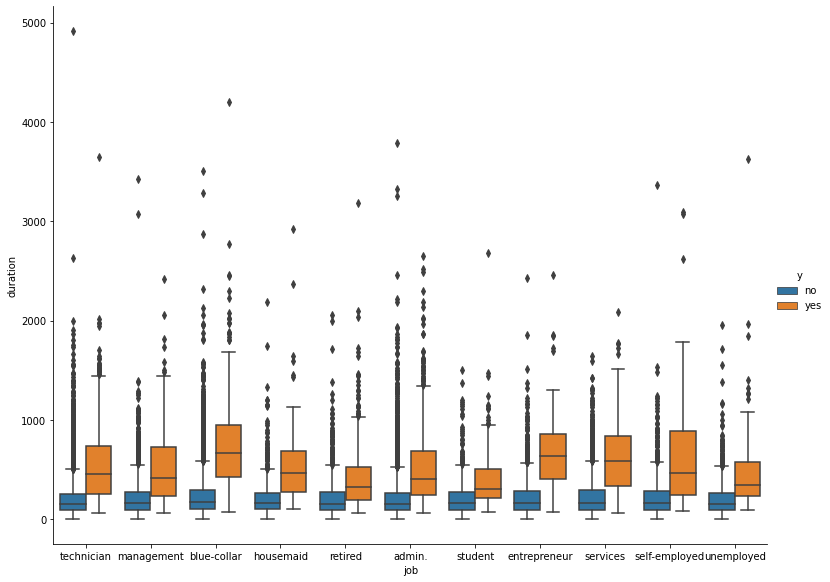

In [ ]:

#idade não é um fator determinante

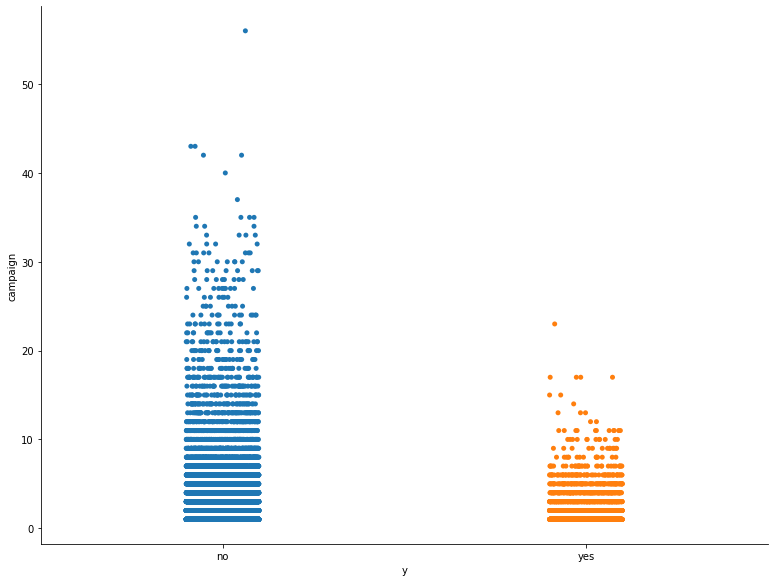

In [ ]:
plt.figure
sns.catplot(data=df, x='y', y='campaign', hue='y', aspect=8/6,height=8) #campaing = numero de contatos
plt.show()

In [ ]:
df[df.y=='yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,40.902299,551.579502,2.055316,790.203305,0.494732,-1.220690,93.361787,-39.819397,2.131688,5095.297031
std,13.831597,400.507671,1.667744,404.722734,0.863898,1.621333,0.675989,6.101435,1.745427,87.923517
min,17.000000,63.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,252.750000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.853250,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.503500,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


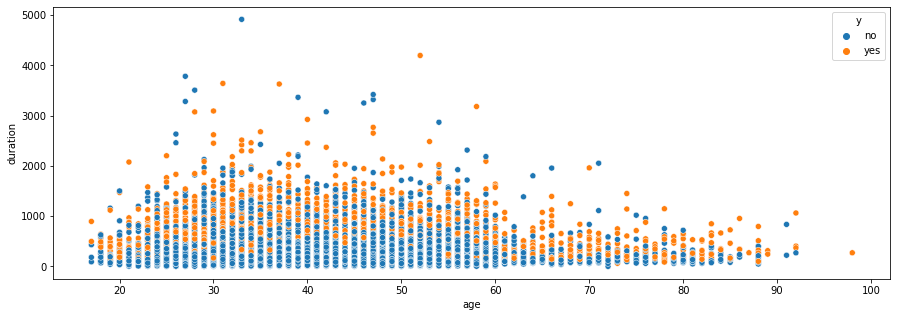

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='age', y='duration', data=df, hue='y')
plt.show()

Modelando


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics

In [ ]:
# codificaçãão One-hot (mas não  vamos usar no modelo)
pd.get_dummies(df, columns=['job'])
#solução: transfora os jobs em dummies
#problema: muitas colunas

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,52,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,0,0,0,0,0,0,0,0,0,1,0
1,36,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0,0,1,0,0,0,0,0,0
2,53,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,1,0,0,0,0,0,0,0,0,0
3,45,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no,0,1,0,0,0,0,0,0,0,0,0
4,60,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,28,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,-1.7,94.215,-40.3,0.876,4991.6,no,0,0,0,0,0,0,0,1,0,0,0
37065,52,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no,0,0,0,0,0,0,0,0,0,1,0
37066,54,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == object]: # df.dtypes == 'object'
    df[c] = df[c].astype('category')

In [ ]:
#df.info()

In [ ]:
#df.job.cat.categories #cat mostra as categorias e tbm adiciona

In [ ]:
#df.education.cat.categories

In [ ]:
df.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)

In [ ]:
#df.education

In [ ]:
#df.job

In [ ]:
#df.job.cat.codes # 9 = technician

In [ ]:
#sum(df.job.isna())

In [ ]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == object]:#df.dtypes=='object
    df[c] =df[c].cat.codes

In [ ]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == 'category']: # df.dtypes == 'object'
    df[c] = df[c].cat.codes

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
2,53,1,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
3,45,1,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0
4,60,3,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0


In [ ]:
Y = df.y
X = df.drop('y',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((31508, 20), (5561, 20), (31508,), (5561,))

In [ ]:
# vericando a divisão
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.11266979814650248, 0.11256968171192232)

In [ ]:
#normalizar os dads
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

In [ ]:
df_norm = pd.DataFrame(X_, columns=df.columns.drop('y'))


In [ ]:
df_norm.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.432099,0.909091,0.333333,0.857143,0.0,1.0,0.5,1.0,0.444444,0.25,0.011387,0.127273,1.000000,0.000000,0.5,1.000000,0.882307,0.376569,0.959193,1.000000
1,0.234568,0.454545,0.666667,1.000000,0.5,1.0,0.5,0.0,0.777778,0.75,0.054290,0.018182,1.000000,0.000000,0.5,0.687500,0.389322,0.368201,0.797778,0.877883
2,0.444444,0.181818,0.666667,0.714286,0.5,1.0,1.0,0.0,0.333333,0.25,0.049410,0.018182,1.000000,0.000000,0.5,1.000000,0.669135,0.338912,0.981183,1.000000
3,0.345679,0.181818,1.000000,0.571429,0.5,1.0,0.5,0.0,0.111111,1.00,0.050630,0.000000,0.004004,0.142857,1.0,0.104167,0.000000,0.811715,0.055543,0.425709
4,0.530864,0.363636,0.666667,0.714286,0.0,1.0,0.5,1.0,0.666667,1.00,0.015047,0.000000,1.000000,0.000000,0.5,0.937500,0.698753,0.602510,0.957606,0.859735


In [ ]:
knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train) #X_train está normalizado

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_class.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred)) # 0 não comprou e 1 comprou

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4935
           1       0.59      0.52      0.55       626

    accuracy                           0.90      5561
   macro avg       0.76      0.73      0.75      5561
weighted avg       0.90      0.90      0.90      5561



#Submetendo para o Kaggle

In [ ]:
aval = pd.read_csv('test.csv', index_col='id')
sub = pd.read_csv('sample.csv', index_col= 'id')

In [ ]:

#Transforma as categorias em números
for c in aval.columns[aval.dtypes == object]: # df.dtypes == 'object'
    df[c] = aval[c].astype('category')

In [ ]:
aval.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)

AttributeError: ignored

In [ ]:
#y_pred

In [ ]:
#sum(y_pred)

In [ ]:
#Visualição do conjunto de treino
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
2,53,1,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1
3,45,1,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2
4,60,3,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0
